In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def diabetic(y,t,ui,d):
    
    g = y[0]                # blood glucose (mg/dL)
    x = y[1]                # remote insulin (micro-u/ml)
    i = y[2]                # insulin (micro-u/ml)
    q1 = y[3]
    q2 = y[4]
    g_gut = y[5]            # gut blood glucose (mg/dl)

    # Parameters:
    gb    = 291.0           # Basal Blood Glucose (mg/dL)
    p1    = 3.17e-2         # 1/min
    p2    = 1.23e-2         # 1/min
    si    = 2.9e-2          # 1/min * (mL/micro-U)
    ke    = 9.0e-2          # 1/min
    kabs  = 1.2e-2          # 1/min
    kemp  = 1.8e-1          # 1/min
    f     = 8.00e-1         # L
    vi    = 12.0            # L
    vg    = 12.0            # L

    # Compute ydot:
    dydt = np.empty(6)
    dydt[0] = -p1*(g-gb) - si*x*g + f*kabs/vg * g_gut + f/vg * d
    dydt[1] =  p2*(i-x) # remote insulin compartment dynamics
    dydt[2] = -ke*i + ui # insulin dynamics
    dydt[3] = ui - kemp * q1
    dydt[4] = -kemp*(q2-q1)
    dydt[5] = kemp*q2 - kabs*g_gut

    # convert from minutes to hours
    dydt = dydt*60
    return dydt


In [3]:
y0 = np.array([76.22, 33.33, 33.33,16.67,16.67,250.0])

In [4]:
u_ss = 3.0 

In [5]:
d_ss = 1000.0 

In [6]:
tf = 24      
ns = tf*6+1 


In [7]:
t = np.linspace(0,tf,ns)

In [8]:
G = np.ones(len(t)) * y0[0]
X = np.ones(len(t)) * y0[1]
I = np.ones(len(t)) * y0[2]
u = np.ones(len(t)) * u_ss
d = np.ones(len(t)) * d_ss

In [9]:
u[10:] = 2.8

In [10]:
meals = [1259,1451,1632,1632,1468,1314,1240,1187,1139,1116,\
          1099,1085,1077,1071,1066,1061,1057,1053,1046,1040,\
          1034,1025,1018,1010,1000,993,985,976,970,964,958,\
          954,952,950,950,951,1214,1410,1556,1603,1445,1331,\
          1226,1173,1136,1104,1088,1078,1070,1066,1063,1061,\
          1059,1056,1052,1048,1044,1037,1030,1024,1014,1007,\
          999,989,982,975,967,962,957,953,951,950,1210,1403,\
          1588,1593,1434,1287,1212,1159,1112,1090,1075,1064,\
          1059,1057,1056,1056,1056,1055,1054,1052,1049,1045,\
          1041,1033,1027,1020,1011,1003,996,986]

In [11]:
for i in range(len(meals)):
    d[i+43] = meals[i]

for i in range(len(t)-1):
    ts = [t[i],t[i+1]]
    y = odeint(diabetic,y0,ts,args=(u[i+1],d[i+1]))
    G[i+1] = y[-1][0]
    X[i+1] = y[-1][1]
    I[i+1] = y[-1][2]
    y0 = y[-1]

In [12]:
data = np.vstack((t,u,G)) 
data = data.T            
np.savetxt('data.txt',data,delimiter=',')

In [18]:
plt.figure(1)
ticks = np.linspace(0,24,13)

<Figure size 432x288 with 0 Axes>

Text(0.8, 0.55, 'Dinner')

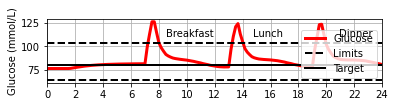

In [19]:
ax=plt.subplot(3,1,2)
ax.grid() # turn on grid
plt.plot(t,G,'r-',linewidth=3,label='Glucose')
plt.plot([0,44],[104,104],'k--',linewidth=2,label='Limits')
plt.plot([0,44],[80,80],'k-',linewidth=2,label='Target')
plt.plot([0,44],[64,64],'k--',linewidth=2)
plt.ylabel('Glucose (mmol/L)')
plt.legend(loc='best')
plt.xlim([0,24])
plt.xticks(ticks)
plt.figtext(0.4, 0.55, 'Breakfast')
plt.figtext(0.6, 0.55, 'Lunch')
plt.figtext(0.8, 0.55, 'Dinner')

([<matplotlib.axis.XTick at 0x14f6c5d9460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

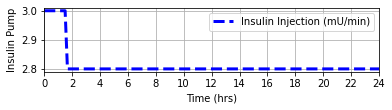

In [20]:
ax=plt.subplot(3,1,1)
ax.grid() # turn on grid
plt.plot(t,u,'b--',linewidth=3)
plt.xlabel('Time (hrs)')
plt.ylabel('Insulin Pump')
plt.legend(['Insulin Injection (mU/min)'],loc='best')
plt.xlim([0,24])
plt.xticks(ticks)

In [21]:
plt.figure(1)
ticks = np.linspace(0,24,13)

<Figure size 432x288 with 0 Axes>

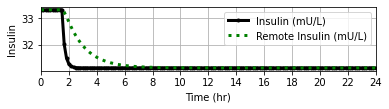

In [22]:
ax=plt.subplot(3,1,3)
ax.grid() # turn on grid
plt.plot(t,I,'k.-',linewidth=3,label='Insulin (mU/L)')
plt.plot(t,X,'g:',linewidth=3,label='Remote Insulin (mU/L)')
plt.ylabel('Insulin')
plt.xlabel('Time (hr)')
plt.xlim([0,24])
plt.legend(loc='best')
plt.xticks(ticks)

plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [24]:
df = pd.read_csv('data1.csv')
df.head()

,user,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,Recommendation
0,1,12/31/2019 6:00,152.410000,174.787557,0.000000,0.0153,0.0,3.215327,3.215327,1.0
1,1,12/31/2019 8.00.00 AM,192.409910,147.265115,15.333333,0.0153,0.0,3.215315,5.215316,2.0
2,1,12/31/2019 6:00,152.409996,152.697123,0.000000,0.0153,0.0,3.215327,3.215327,1.0
3,1,12/31/2019 6:00,152.409994,149.272604,0.000000,0.0153,0.0,3.215326,3.215326,1.0
4,3,12/31/2019 7:00,72.409963,146.494981,0.000000,0.0153,0.0,3.215322,3.215322,0.0


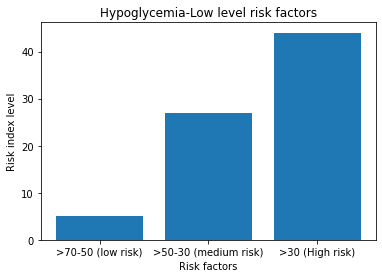

In [25]:
F = df[df['Recommendation'] == 0.0].count()['Recommendation']
M = df[df['Recommendation'] == 1.0].count()['Recommendation']
N = df[df['Recommendation'] == 2.0].count()['Recommendation']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['>70-50 (low risk)', '>50-30 (medium risk)','>30 (High risk)'], height = [F, M, N])
plt.xlabel('Risk factors')
plt.ylabel('Risk index level')
plt.title('Hypoglycemia-Low level risk factors')
plt.show()


In [26]:
print('>70-50  Low risk suggested to  take insulin/meals: ', min(df[df['Recommendation'] == 0]['BG']))
print('>50-30 medium risk: ', max(df[df['Recommendation'] == 0]['BG']))
print('>30 below severe risk factor-emergeny need: ', df[df['Recommendation'] == 0]['BG'].mean())

>70-50  Low risk suggested to  take insulin/meals:  52.4099511
>50-30 medium risk:  72.40996340000001
>30 below severe risk factor-emergeny need:  64.40995054


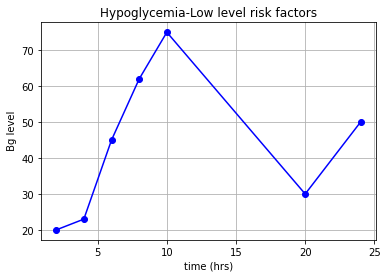

In [27]:
Data = {'BG':[20,23,45,62,75,30,50],
    'time':[2,4,6,8,10,20,24]
     
       }
df = pd.DataFrame(Data)
plt.plot(df['time'], df['BG'],color='blue',marker='o')
plt.title('Hypoglycemia-Low level risk factors')
plt.xlabel('time (hrs)')
plt.ylabel(' Bg level')
plt.grid(True)
plt.show()

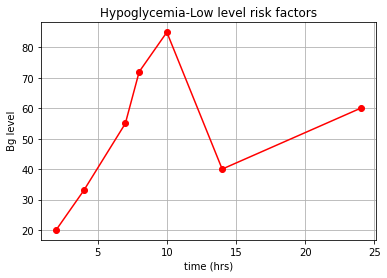

In [28]:
Data = {'time':[2,4,7,8,10,14,24],
        'BG' : [20,33,55,72,85,40,60]
           }
df = pd.DataFrame(Data)
plt.plot(df['time'], df['BG'],color='red',marker='o')
plt.title('Hypoglycemia-Low level risk factors')
plt.xlabel('time (hrs)')
plt.ylabel(' Bg level')
plt.grid(True)
plt.show()

In [29]:
print('alert the patient at 8am there may be a chance Hypo "BG" better to take insulin/sweet/meals')

alert the patient at 8am there may be a chance Hypo "BG" better to take insulin/sweet/meals


In [30]:
df = pd.read_csv('data1.csv')
df.head()

,user,Time,BG,CGM,CHO,insulin,LBGI,HBGI,Risk,Recommendation
0,1,12/31/2019 6:00,152.410000,174.787557,0.000000,0.0153,0.0,3.215327,3.215327,1.0
1,1,12/31/2019 8.00.00 AM,192.409910,147.265115,15.333333,0.0153,0.0,3.215315,5.215316,2.0
2,1,12/31/2019 6:00,152.409996,152.697123,0.000000,0.0153,0.0,3.215327,3.215327,1.0
3,1,12/31/2019 6:00,152.409994,149.272604,0.000000,0.0153,0.0,3.215326,3.215326,1.0
4,3,12/31/2019 7:00,72.409963,146.494981,0.000000,0.0153,0.0,3.215322,3.215322,0.0


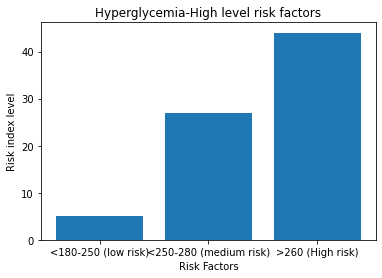

In [31]:
F = df[df['Recommendation'] == 0.0].count()['Recommendation']
M = df[df['Recommendation'] == 1.0].count()['Recommendation']
N = df[df['Recommendation'] == 2.0].count()['Recommendation']
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x= ['<180-250 (low risk)', '<250-280 (medium risk)','>260 (High risk)'], height = [F, M, N])
plt.xlabel('Risk Factors')
plt.ylabel('Risk index level')
plt.title('Hyperglycemia-High level risk factors')
plt.show()

In [33]:
print('<180-250 (low risk) suggested to  take insulin/meals: ', min(df[df['Recommendation'] == 0]['BG']))
print('<250-280 (medium risk): ', max(df[df['Recommendation'] == 1]['BG']))
print('>260 (High risk): ', df[df['Recommendation'] == 0]['BG'].mean())

<180-250 (low risk) suggested to  take insulin/meals:  52.4099511
<250-280 (medium risk):  310.60922769999996
>260 (High risk):  64.40995054


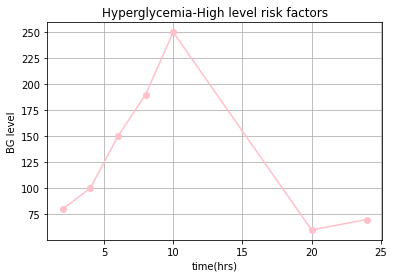

In [34]:
Data = {'time':[2,4,6,8,10,20,24],
     'BG':[80,100,150,190,250,60,70]
       
       }
df = pd.DataFrame(Data)
plt.plot(df['time'], df['BG'],color='pink',marker='o')
plt.title('Hyperglycemia-High level risk factors')
plt.xlabel('time(hrs)')
plt.ylabel('BG level')
plt.grid(True)
plt.show()

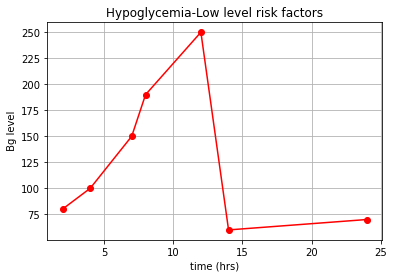

In [35]:
Data = {'time':[2,4,7,8,12,14,24],
        'BG' : [80,100,150,190,250,60,70]
           }
df = pd.DataFrame(Data)
plt.plot(df['time'], df['BG'],color='red',marker='o')
plt.title('Hypoglycemia-Low level risk factors')
plt.xlabel('time (hrs)')
plt.ylabel(' Bg level')
plt.grid(True)
plt.show()

In [36]:
print('alert the patient at 12am there may be a chance Hyper "BG" better to take insulin/sweet/meals')

alert the patient at 12am there may be a chance Hyper "BG" better to take insulin/sweet/meals


In [37]:
import tensorflow as tf
tf.estimator.DNNClassifier

tensorflow_estimator.python.estimator.canned.dnn.DNNClassifierV2

In [51]:
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]

In [52]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
def get_data():
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy

In [55]:
def get_model(trainX, trainy):
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model

In [56]:
# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)

Train: 0.834, Test: 0.854


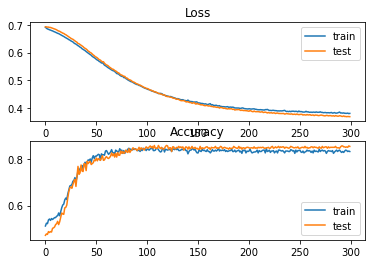

In [57]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
n_test = 500
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [58]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
def get_data():
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy
 

def get_model(trainX, trainy):

	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model
trainX, trainy, testX, testy = get_data()

model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
yhat_classes = model.predict_classes(testX, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %f' % f1)
 

auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

Accuracy: 0.852000
Precision: 0.858871
Recall: 0.845238
F1 score: 0.852000
ROC AUC: 0.924667
[[213  35]
 [ 39 213]]


C:\Users\Uniso PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

